# Scenario Description: Automatic Watering System Based on Soil Moisture

Scenario Description: Automatic Watering System Based on Soil Moisture

The goal of this system is to create an intelligent irrigation application that can detect soil dryness and automatically apply water to the soil when needed. The system will work by assessing the moisture level of the soil, which will be categorized as dry, normal, or wet. Based on this assessment, the system will either activate the watering mechanism or refrain from applying water. This ensures that the soil receives the necessary water without waste, optimizing resources in agricultural or smart garden settings.

Logic Programming is well-suited for this system because it allows for the clear definition of rules and facts, enabling the system to reason logically about the moisture level and make decisions based on predefined relationships. For example, if the soil is dry, the system will activate the watering process, which can be expressed using a rule-based logic system. On the other hand, Fuzzy Logic is useful in handling the uncertainty inherent in real-world conditions. Soil moisture doesn’t fall into perfectly defined categories, so fuzzy logic allows us to represent moisture levels on a continuum, allowing for a gradual decision-making process. This combination of rule-based and fuzzy systems provides flexibility and accuracy in decision-making, ensuring that the watering process is both efficient and responsive to changing conditions.

# Step 1: Declare Terms, Facts, and Rules

In [ ]:
from pyDatalog import pyDatalog

# Reset any previous definitions
pyDatalog.clear()

# Declare terms (predicates)
pyDatalog.create_terms('SoilCondition, applyWater, doNotApply, X, Y, watering_sim')

# Define facts using +Predicate(arg1, arg2)
+SoilCondition('dry', 'applyWater')
+SoilCondition('normal', 'doNotApply')
+SoilCondition('wet', 'doNotApply')

# Define rules
applyWater(X) <= SoilCondition(X, 'applyWater')
doNotApply(X) <= SoilCondition(X, 'doNotApply')


doNotApply(X) <= SoilCondition(X,'doNotApply')

# Step 2: Query the System and Get Outputs

In [ ]:
# Query for all conditions and associated actions
print("All Soil Conditions and Actions:")
print(SoilCondition(X, Y))

# Check if we should apply water when soil is dry
print("\nShould apply water when soil is dry?")
result_dry = applyWater('dry')
print(bool(result_dry))  # True if result is non-empty

# Check if we should NOT apply water when soil is wet
print("\nShould not apply water when soil is wet?")
result_wet = doNotApply('wet')
print(bool(result_wet))  # True if result is non-empty


All Soil Conditions and Actions:
X      | Y         
-------|-----------
wet    | doNotApply
normal | doNotApply
dry    | applyWater

Should apply water when soil is dry?
True

Should not apply water when soil is wet?
True


# Task 3: Enhancing the System with Fuzzy Logic

# Required Libraries

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


# Define Fuzzy Variables and Membership Functions

In [ ]:
# Define fuzzy variables
moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'moisture')
water = ctrl.Consequent(np.arange(0, 11, 1), 'water')

# Define membership functions for moisture
moisture['dry'] = fuzz.trimf(moisture.universe, [0, 0, 50])
moisture['normal'] = fuzz.trimf(moisture.universe, [30, 50, 70])
moisture['wet'] = fuzz.trimf(moisture.universe, [60, 100, 100])

# Define membership functions for water
water['low'] = fuzz.trimf(water.universe, [0, 0, 4])
water['medium'] = fuzz.trimf(water.universe, [2, 5, 8])
water['high'] = fuzz.trimf(water.universe, [6, 10, 10])


In [ ]:
#Input: Soil Moisture
#Range: 0 (very dry) to 100 (very wet)

#Output: Water Amount
#Range: 0 (no water) to 10 (high water amount)

# Plot Membership Functions

C:\Users\kavin\AppData\Roaming\Python\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


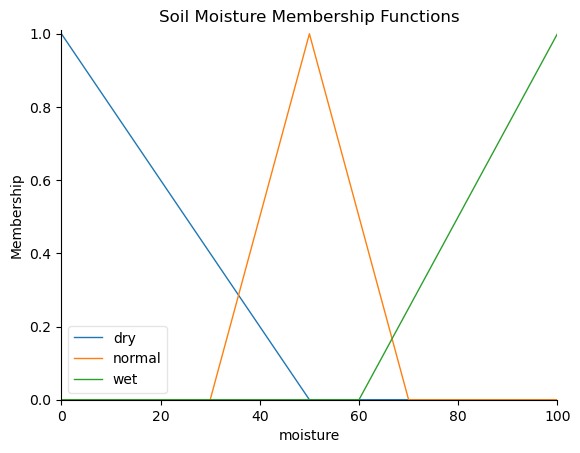

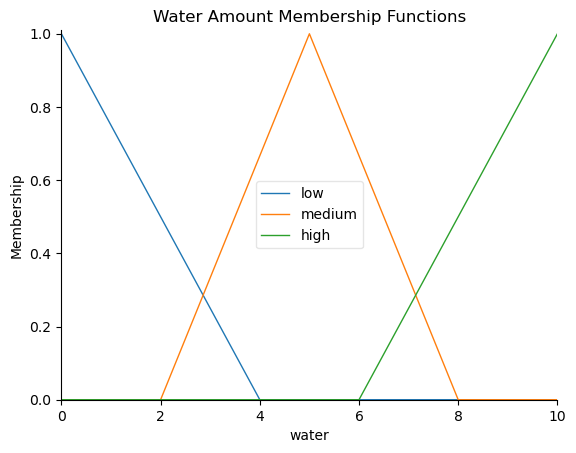

In [ ]:
# Plot moisture
moisture.view()
plt.title("Soil Moisture Membership Functions")
plt.show()

# Plot water
water.view()
plt.title("Water Amount Membership Functions")
plt.show()


# Define Fuzzy Rules

In [ ]:
rule1 = ctrl.Rule(moisture['dry'], water['high'])
rule2 = ctrl.Rule(moisture['normal'], water['medium'])
rule3 = ctrl.Rule(moisture['wet'], water['low'])


# Create Control System and Simulation

In [ ]:
watering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
watering_sim = ctrl.ControlSystemSimulation(watering_ctrl)


# Test System with Varying Inputs

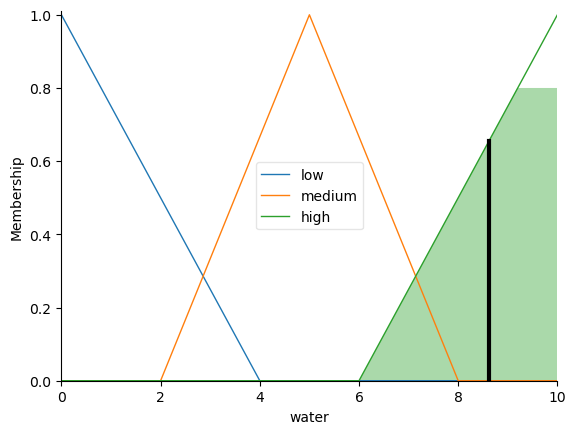

Moisture: 10%
Approximate Water in Liters: 1.724 L
Approximate Water in mL: 1724 mL
Water to apply: 8.62 (Fuzzy output)


In [ ]:
# Test System with Varying Inputs and Calculate Water in Liters
# Assume the max water capacity is 2 liters (2000 milliliters) when water = 10

def calculate_water_liters(water_level, max_liters=2.0):
    return (water_level / 10.0) * max_liters

# Create a NEW simulation instance each time
watering_sim = ctrl.ControlSystemSimulation(watering_ctrl)

# Example 1: Very dry soil (moisture = 10%)
moisture_level = 10
watering_sim.input['moisture'] = moisture_level
watering_sim.compute()

#  Correct access to the fuzzy output value (now a real number)
water_needed = watering_sim.output.get('water', 0)
liters_needed = calculate_water_liters(water_needed)
water.view(sim=watering_sim)
plt.show()


print(f"Moisture: {moisture_level}%")
print(f"Approximate Water in Liters: {liters_needed:.3f} L")
print(f"Approximate Water in mL: {liters_needed * 1000:.0f} mL")
print(f"Water to apply: {water_needed:.2f} (Fuzzy output)")


Moisture: 50%
Approximate Water in Liters: 1.000 L
Approximate Water in mL: 1000 mL
Water to apply: 5.00 (Fuzzy output)


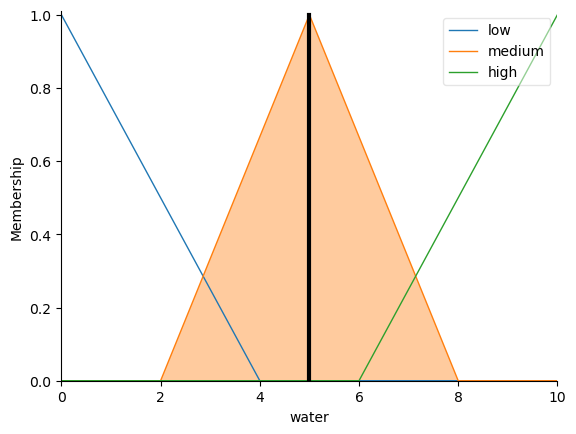

In [ ]:
# Test System with Varying Inputs and Calculate Water in Liters
# Assume the max water capacity is 2 liters (2000 milliliters) when water = 10

def calculate_water_liters(water_level, max_liters=2.0):
    return (water_level / 10.0) * max_liters

# Create a NEW simulation instance each time
watering_sim = ctrl.ControlSystemSimulation(watering_ctrl)

# Example 1: Very dry soil (moisture = 50%)
moisture_level = 50
watering_sim.input['moisture'] = moisture_level
watering_sim.compute()

#  Correct access to the fuzzy output value (now a real number)
water_needed = watering_sim.output.get('water', 0)
liters_needed = calculate_water_liters(water_needed)

print(f"Moisture: {moisture_level}%")
print(f"Approximate Water in Liters: {liters_needed:.3f} L")
print(f"Approximate Water in mL: {liters_needed * 1000:.0f} mL")
print(f"Water to apply: {water_needed:.2f} (Fuzzy output)")

water.view(sim=watering_sim)
plt.show()



Moisture: 90%
Approximate Water in Liters: 0.280 L
Approximate Water in mL: 280 mL
Water to apply: 1.40 (Fuzzy output)


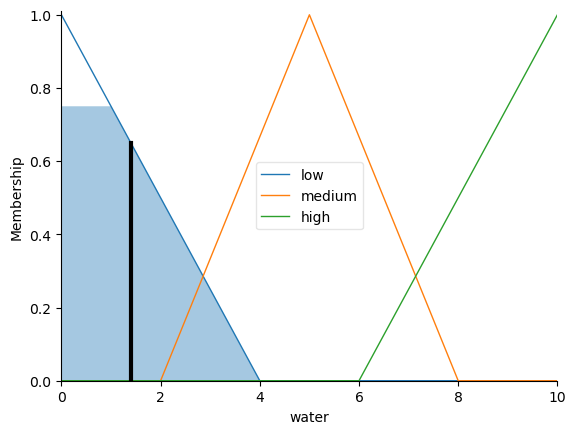

In [ ]:
# Test System with Varying Inputs and Calculate Water in Liters
# Assume the max water capacity is 2 liters (2000 milliliters) when water = 10

def calculate_water_liters(water_level, max_liters=2.0):
    return (water_level / 10.0) * max_liters

# Create a NEW simulation instance each time
watering_sim = ctrl.ControlSystemSimulation(watering_ctrl)

# Example 1: Very dry soil (moisture =90%)
moisture_level = 90
watering_sim.input['moisture'] = moisture_level
watering_sim.compute()

#  Correct access to the fuzzy output value (now a real number)
water_needed = watering_sim.output.get('water', 0)
liters_needed = calculate_water_liters(water_needed)

print(f"Moisture: {moisture_level}%")
print(f"Approximate Water in Liters: {liters_needed:.3f} L")
print(f"Approximate Water in mL: {liters_needed * 1000:.0f} mL")
print(f"Water to apply: {water_needed:.2f} (Fuzzy output)")

water.view(sim=watering_sim)
plt.show()

